# Task 2
## To Explore Supervised Machine Learning
 * By Apoorva Kumar

In [1]:
#Import all Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics 
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("http://bit.ly/w-data")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


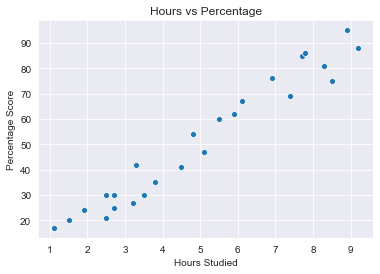

In [6]:
sns.scatterplot(x = df['Hours'], y = df['Scores'])  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

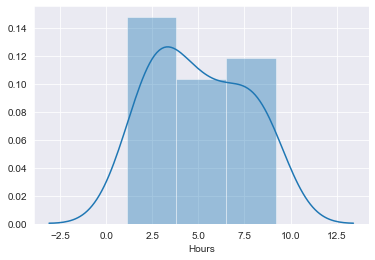

In [7]:
sns.distplot(df.Hours)

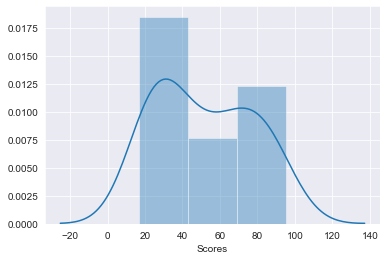

In [8]:
sns.distplot(df.Scores)

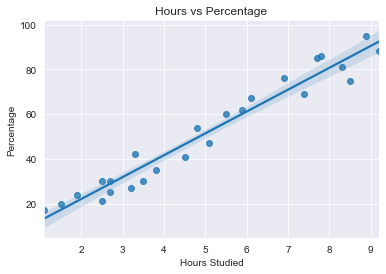

In [9]:
sns.regplot(x = df['Hours'], y = df['Scores'])
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.show()

### Analysing the correlation between the variables

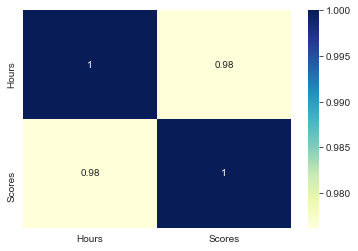

In [10]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True);

## Preparing the data
* The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).



In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [12]:
# split this data into training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Algorithm

In [13]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

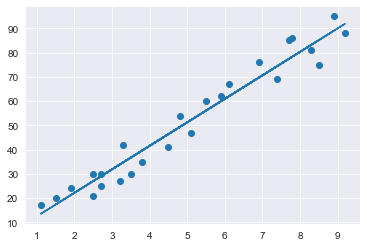

In [14]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [17]:
hours = np.array([[9.25]])
hours = hours.reshape(-1,1)
_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.38611528261494


In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244


In [19]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 18.943211722315272


In [20]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.352380006653288
